In [3]:
# Importing Required Libraries
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np




In [4]:
# Loading the Dataset
# We use the 'affairs' dataset from the 'statsmodels' library
data = sm.datasets.fair.load_pandas().data

# Adding a binary 'had_affair' column: 1 if affairs > 0, else 0
data['had_affair'] = (data['affairs'] > 0).astype(int)

# Data Preprocessing
# Creating dummy variables for the categorical 'occupation' and 'occupation_husb' columns
data = pd.get_dummies(data, columns=['occupation', 'occupation_husb'], drop_first=True)




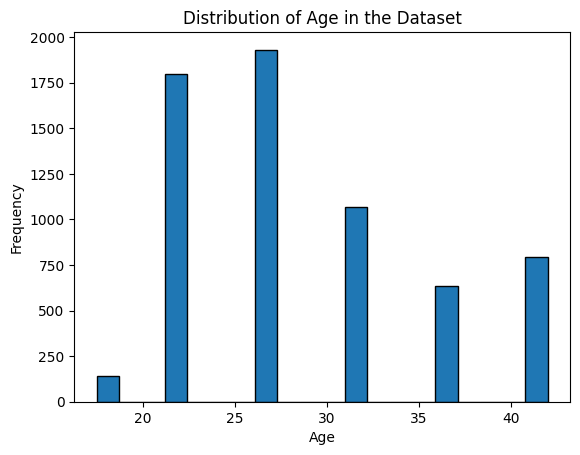

In [5]:
# Exploratory Data Analysis (EDA)
# Visualizing the distribution of age
plt.hist(data['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age in the Dataset')
plt.show()




In [6]:
# Building the Generalized Linear Model (GLM)
# Preparing the data for modeling
X = data.drop(columns=['affairs', 'had_affair'])  # Explanatory variables
y = data['had_affair']  # Response variable
X = sm.add_constant(X)  # Adding a constant term


In [8]:
# Fitting the GLM model with the Binomial family (for logistic regression)
model = sm.GLM(y, X, family=sm.families.Binomial())
result = model.fit()
print(result.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:             had_affair   No. Observations:                 6366
Model:                            GLM   Df Residuals:                     6349
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3456.2
Date:                Fri, 24 Nov 2023   Deviance:                       6912.3
Time:                        09:27:17   Pearson chi2:                 6.29e+03
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1577
Covariance Type:            nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.9708    

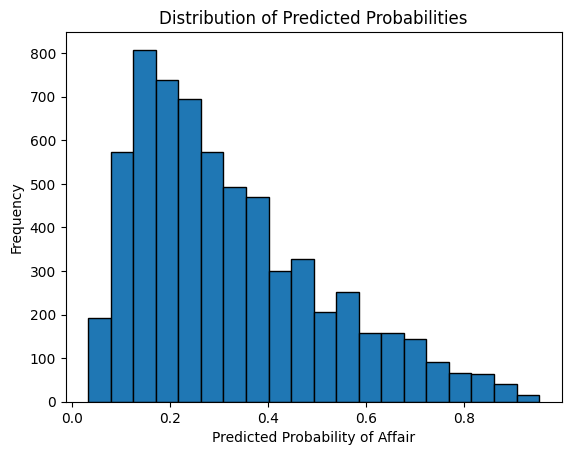

In [9]:
# Model Diagnostics and Visualization
# For logistic regression, we can look at the distribution of predicted probabilities
predicted_probs = result.predict(X)
plt.hist(predicted_probs, bins=20, edgecolor='black')
plt.xlabel('Predicted Probability of Affair')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.show()



In [10]:
# Model Interpretation
# Interpret the coefficients in terms of odds ratios
odds_ratios = pd.DataFrame(np.exp(result.params), columns=['Odds Ratio'])
print(odds_ratios)

                     Odds Ratio
const                 19.506642
rate_marriage          0.491532
age                    0.940561
yrs_married            1.114021
children               1.015768
religious              0.687024
educ                   0.998276
occupation_2.0         1.477333
occupation_3.0         2.019155
occupation_4.0         1.602231
occupation_5.0         2.869671
occupation_6.0         3.028342
occupation_husb_2.0    1.185835
occupation_husb_3.0    1.328662
occupation_husb_4.0    1.153546
occupation_husb_5.0    1.188068
occupation_husb_6.0    1.200530
